In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [92]:
Calories = pd.read_csv('D:\Dekstop\Workout calories.csv')
Calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [93]:
exercise = pd.read_csv('D:\Dekstop\Workout exercise.csv')
exercise.head()    

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [94]:
Calories_data = pd. concat([exercise, Calories['Calories']], axis=1)
Calories_data.head(4)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0


In [95]:
# No of Rows n columns
Calories_data.shape

(15000, 9)

In [96]:
#Chucking for null values
Calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

#### Data analsys

In [97]:
#statstical measurments
Calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


#### Data Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

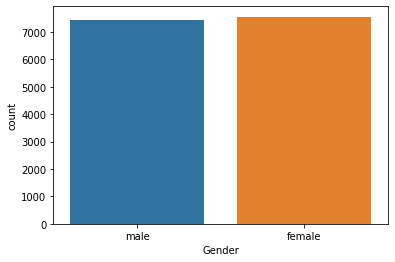

In [98]:
# Plot the 'Gender column in count plot'
sns.countplot(Calories_data['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

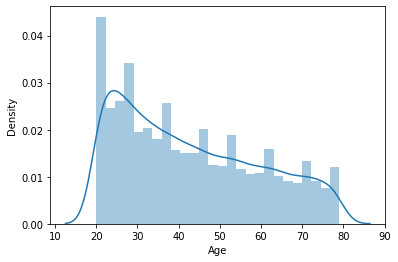

In [99]:
#Finding the distrubution 'Age'
sns.distplot(Calories_data['Age'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

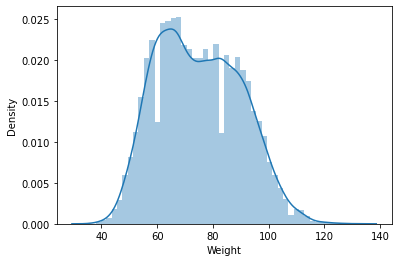

In [100]:
#Finding the distrubution 'Weight'
sns.distplot(Calories_data['Weight'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

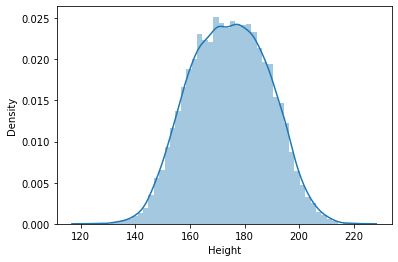

In [101]:
#Finding the distrubution 'Height'
sns.distplot(Calories_data['Height'])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

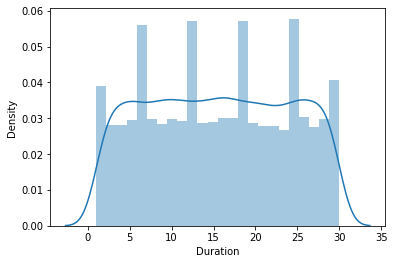

In [102]:
#Finding the distrubution 'Duration'
sns.distplot(Calories_data['Duration'])

<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

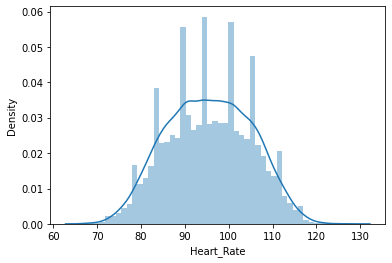

In [103]:
#Finding the distrubution 'Heart_Rate'
sns.distplot(Calories_data['Heart_Rate'])

In [104]:
#Find the correlation in the data set
correlation =Calories_data.corr()

<AxesSubplot:>

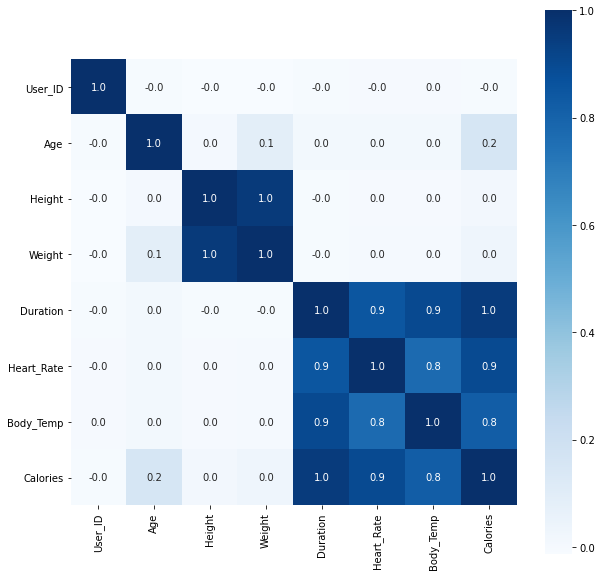

In [105]:
# Constructing Correlation Heat map to under stand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')
           

#### Convert Text to Numerical

In [106]:
Calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [107]:
Calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


#### Separating features & targets


In [108]:
X = Calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = Calories_data['Calories']

In [109]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [110]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


### Plitting the data


In [111]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [112]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [113]:
print(Y.shape,Y_train.shape, Y_test.shape)

(15000,) (12000,) (3000,)


#### Model Training

In [128]:
Final = XGBRegressor()

In [129]:
Final.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
#Create a Function with many ML modules
def models(X_train,Y_train):
    
    #Use LogisticRegression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    #Use KNeighbors
    #from sklearn.neighbors import KNeighborsClassifier
    #knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
    #knn.fit(X_train,Y_train)
    
    #Use SVM(Linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #use SVC(RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion ='entropy',random_state=0)
    tree.fit(X_train,Y_train)
    
    #use RF classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10,criterion ='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
     #Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train,Y_train))
    #print('[1]KNN:', knn.score(X_train,Y_train))
    print('[2]SVC linear:', svc_lin.score(X_train,Y_train))
    print('[3]SVC RBF:', svc_rbf.score(X_train,Y_train))
    print('[4]Gaussion:', gauss.score(X_train,Y_train))
    print('[5]Dession tree:', tree.score(X_train,Y_train))
    print('[6]Random Forest:', forest.score(X_train,Y_train))
   
    
    return log,svc_lin, svc_rbf,gauss,tree,forest
    

In [131]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.05633333333333333
[2]SVC linear: 0.19708333333333333
[3]SVC RBF: 0.023
[4]Gaussion: 0.08791666666666667
[5]Dession tree: 1.0
[6]Random Forest: 0.9924166666666666


#### Evaluatio of the model

In [133]:
test_data_prediction = Final.predict(X_test)

In [135]:
print(test_data_prediction)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


#### Mean Absolute error

In [136]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [137]:
print('Mean Absolute Error=',mae)

Mean Absolute Error= 1.480704915146033


In [139]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)